# Lecture 1

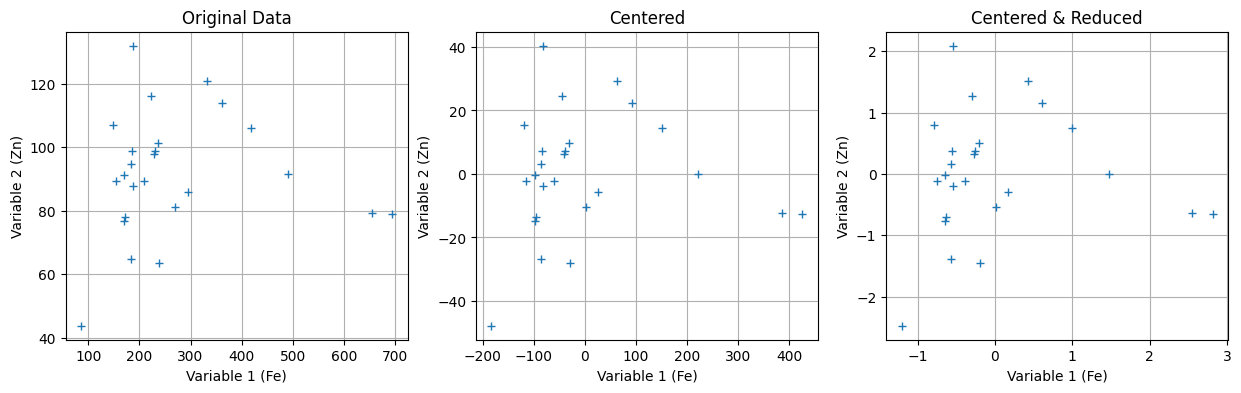

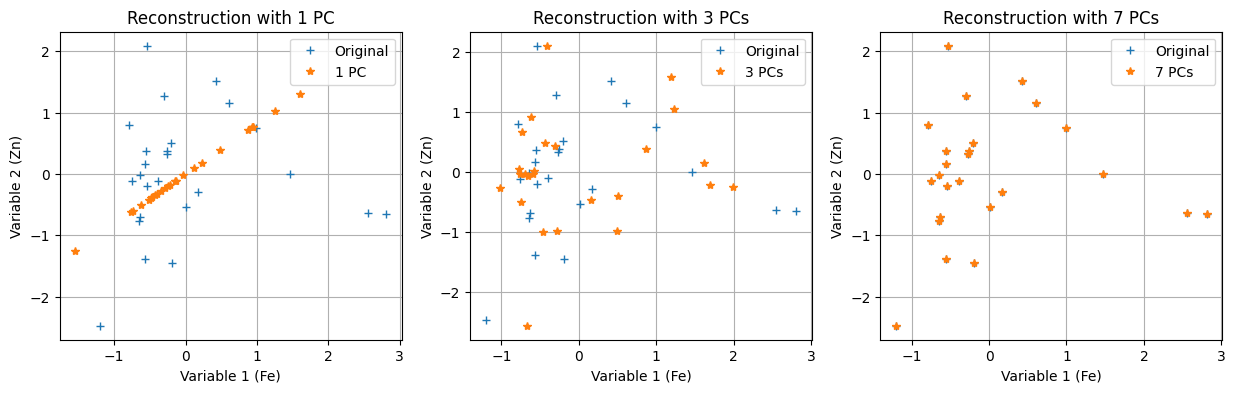

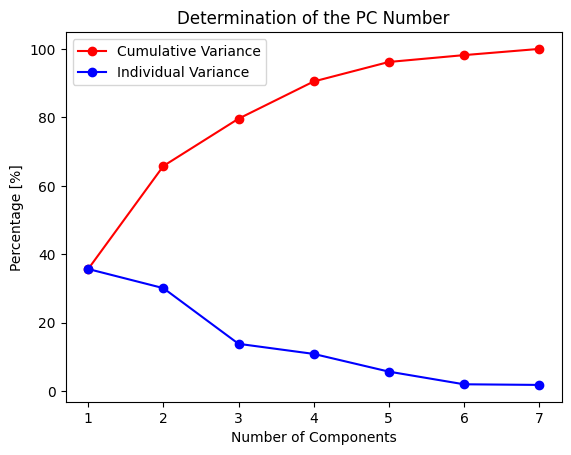

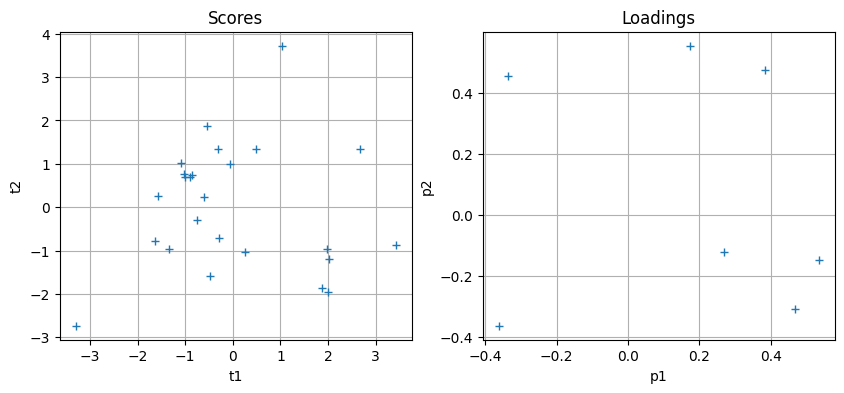

In [ ]:
# %% [code]
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# ---------------------------
# Load the data from Data.mat
# ---------------------------
data = loadmat('Data.mat')  # make sure Data.mat is in the working directory
X = data['X']              # assuming the variable is named 'X' in the MAT file

# Notes: you could also load the data using pandas in the case of a CSV file, e.g., pd.read_csv('Data.csv') and turn it into a numpy array.

# import pandas as pd

# # Read CSV file into a DataFrame
# df = pd.read_csv('data.csv')

# # Convert DataFrame to a NumPy array (if needed)
# X = df.values

# ---------------------------
# Normalization
# ---------------------------
# Centered matrix: subtract the mean of each column.
Xc = X - np.mean(X, axis=0)

# Centered and Reduced matrix: subtract mean and divide by standard deviation.
# Use ddof=1 for an unbiased estimator (matching MATLAB's default).
Xcr = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)

# ---------------------------
# Correlation matrices
# ---------------------------
# 1st method: using numpy's corrcoef (set rowvar=False so that columns are variables)
R1xy = np.corrcoef(X, rowvar=False)

# 2nd method: using the centered and reduced matrix
R2xy = np.dot(Xcr.T, Xcr) / (Xcr.shape[0] - 1)

# 3rd method: using the original data (note: without standardization, this is not a proper correlation matrix)
R3xy = np.dot(X.T, X) / (X.shape[0] - 1)

# ---------------------------
# Eigen-decomposition (PCA on the correlation matrix)
# ---------------------------
eigvals, eigvecs = np.linalg.eig(R1xy)

# Sort the eigenvalues and eigenvectors in descending order
idx = np.argsort(eigvals)[::-1]  # indices for sorting in descending order
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Compute the percentage of explained variance (each eigenvalue corresponds to a principal component)
explained_variance = eigvals / np.sum(eigvals) * 100

# ---------------------------
# Scores matrix: project standardized data onto the eigenvector space
# ---------------------------
Tnew = np.dot(Xcr, eigvecs)

# ---------------------------
# Matrix reconstruction (decomposition)
# ---------------------------
# Full reconstruction using all principal components:
XcrN = np.dot(Tnew, eigvecs.T)

# Reconstruction using a selected number of principal components
# (assuming there are at least 7 variables as in your MATLAB code)
XcrD7 = np.dot(Tnew[:, :7], eigvecs[:, :7].T)   # using 7 PCs
XcrD3 = np.dot(Tnew[:, :3], eigvecs[:, :3].T)   # using 3 PCs
XcrD1 = np.dot(Tnew[:, :1], eigvecs[:, :1].T)   # using 1 PC

# ---------------------------
# Determination of necessary number of PCs (cumulative explained variance)
# ---------------------------
num_components = np.arange(1, len(eigvals) + 1)
cumulative_variance = np.cumsum(explained_variance)
RESCUMUL = np.column_stack((num_components, cumulative_variance))

# ---------------------------
# Plot: Fe vs Zn for Original, Centered, and Centered & Reduced Data
# ---------------------------
# Note: MATLAB uses 1-indexing. In the MATLAB code, variable 6 is Fe and 7 is Zn.
# In Python (0-indexed) these are columns 5 and 6.
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(X[:, 5], X[:, 6], '+')
plt.title('Original Data')
plt.xlabel('Variable 1 (Fe)')
plt.ylabel('Variable 2 (Zn)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(Xc[:, 5], Xc[:, 6], '+')
plt.title('Centered')
plt.xlabel('Variable 1 (Fe)')
plt.ylabel('Variable 2 (Zn)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(Xcr[:, 5], Xcr[:, 6], '+')
plt.title('Centered & Reduced')
plt.xlabel('Variable 1 (Fe)')
plt.ylabel('Variable 2 (Zn)')
plt.grid(True)

plt.show()

# ---------------------------
# Plot: Original Data vs. Decomposition using 1, 3, and 7 PCs
# ---------------------------
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(Xcr[:, 5], Xcr[:, 6], '+', label='Original')
plt.plot(XcrD1[:, 5], XcrD1[:, 6], '*', label='1 PC')
plt.title('Reconstruction with 1 PC')
plt.xlabel('Variable 1 (Fe)')
plt.ylabel('Variable 2 (Zn)')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(Xcr[:, 5], Xcr[:, 6], '+', label='Original')
plt.plot(XcrD3[:, 5], XcrD3[:, 6], '*', label='3 PCs')
plt.title('Reconstruction with 3 PCs')
plt.xlabel('Variable 1 (Fe)')
plt.ylabel('Variable 2 (Zn)')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(Xcr[:, 5], Xcr[:, 6], '+', label='Original')
plt.plot(XcrD7[:, 5], XcrD7[:, 6], '*', label='7 PCs')
plt.title('Reconstruction with 7 PCs')
plt.xlabel('Variable 1 (Fe)')
plt.ylabel('Variable 2 (Zn)')
plt.legend()
plt.grid(True)

plt.show()

# ---------------------------
# Plot: Determination of the Number of PCs
# ---------------------------
plt.figure()
plt.plot(RESCUMUL[:, 0], RESCUMUL[:, 1], '-ro', label='Cumulative Variance')
plt.plot(num_components, explained_variance, '-bo', label='Individual Variance')
plt.title('Determination of the Number of PCs')
plt.xlabel('Number of Components')
plt.ylabel('Percentage [%]')
plt.legend()
plt.show()

# ---------------------------
# Plot: Scores and Loadings
# ---------------------------
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(Tnew[:, 0], Tnew[:, 1], '+')
plt.title('Scores')
plt.xlabel('t1')
plt.ylabel('t2')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(eigvecs[:, 0], eigvecs[:, 1], '+')
plt.title('Loadings')
plt.xlabel('p1')
plt.ylabel('p2')
plt.grid(True)

plt.show()
